<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**
CS6501 - MACHINE LEARNING AND APPLICATIONS
#**Business Analytics - MSc**
ET5003 - MACHINE LEARNING APPLICATIONS 
##***Annual Repeat***
###Instructor: Enrique Naredo

###RepMLA_3.1


In [ ]:
#@title Current Date
Today = '2021-08-02' #@param {type:"date"}


In [ ]:
#@markdown ---
#@markdown ### Enter your details here:
Student_ID = "20285167" #@param {type:"string"}
Student_full_name = "Caoimhe Mulhall" #@param {type:"string"}
#@markdown ---

In [ ]:
#@title Notebook information
Notebook_type = 'Etivity' #@param ["Example", "Lab", "Practice", "Etivity", "Assignment", "Exam"]
Version = Final #@param ["Draft", "Final"] {type:"raw"}
Submission = True #@param {type:"boolean"}

# Part 1

In [ ]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


     |████████████████████████████████| 993 kB 9.1 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ae7e7fb1a83c26abd007d11548c8a3f08cdc6ae126dd65f8762f5d04a7d6f524
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
## Antecedent/Consequent objects hold universe variables 

# Antecedent-1
# how good was the service of the wait staff, on a scale of 0 to 10?
service = ctrl.Antecedent(np.arange(0, 10+1, 1), 'service')

# Antecedent-2
# how tasty was the food, on a scale of 0 to 10?
quality = ctrl.Antecedent(np.arange(0, 10+1, 1), 'quality')


## Consequent
# how much should we tip, on a scale of 0% to 25%?
tip = ctrl.Consequent(np.arange(0, 25+1, 1), 'tip')


We can use the fuzzy membership function generators, here you have the link to the module [membership](https://pythonhosted.org/scikit-fuzzy/api/skfuzzy.membership.html)

##TASK:
* Antecedents:
 * Fuzzy triangular sets for 'service': unacceptable, poor, acceptable, good, amazing
 * Fuzzy trapezoidal sets for 'quality': really_bad, bad, decent, great, really_great
* Consequents:
 * Fuzzy Gaussian sets for 'tip': very_low, low, medium, high, very_high 

In [ ]:
## auto-membership function population is possible with .automf(3, 5, or 7)
# qualtity with 5 membership functions
#quality.automf(5)
# service with 5 membership functions
# service.automf(5)


In [ ]:
# you can build your membership functions with custom parameters
quality['really_bad'] = fuzz.trapmf(quality.universe, [0, 0, 0, 2])
quality['bad'] = fuzz.trapmf(quality.universe, [0, 1, 2, 2])
quality['decent'] = fuzz.trapmf(quality.universe, [2, 3, 4, 5])
quality['great'] = fuzz.trapmf(quality.universe, [4, 6, 8, 10])
quality['really_great'] = fuzz.trapmf(quality.universe, [8, 9, 10, 10])

In [ ]:
# you can build your membership functions with custom parameters
service['unacceptable'] = fuzz.trimf(service.universe, [0, 2.5, 5])
service['poor'] = fuzz.trimf(service.universe, [2.5, 5, 7.5])
service['acceptable'] = fuzz.trimf(service.universe, [5, 7.5,])
service['good'] = fuzz.trimf(service.universe, [7.5, 7.5, 10])
service['amazing'] = fuzz.trimf(service.universe, [7.5, 10, 10])

In [ ]:
# you can build your membership functions with custom parameters
# SD set at 2
tip['very_low'] = fuzz.gaussmf(tip.universe, 0, 2)
tip['low'] = fuzz.gaussmf(tip.universe, 5, 2)
tip['medium'] = fuzz.gaussmf(tip.universe, 10, 2)
tip['high'] = fuzz.gaussmf(tip.universe, 15, 2)
tip['very_high'] = fuzz.gaussmf(tip.universe, 20, 2)

To help understand what the membership looks like, use the view methods.

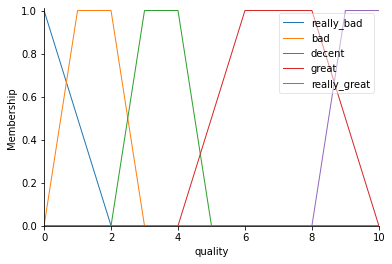

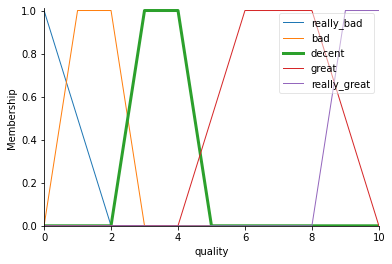

In [ ]:
## You can see how these look with .view()

# show 'quality' membership functions 
quality.view()

# show membership functions and highlight one
quality['decent'].view()

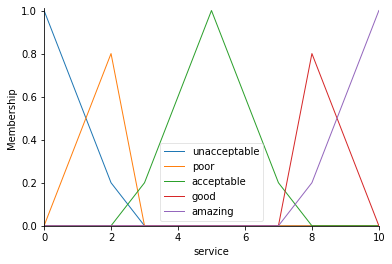

In [ ]:
# show 'service' membership functions 
service.view()

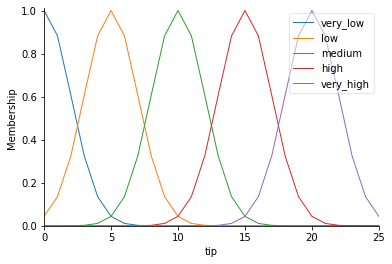

In [ ]:
# show 'tip' membership functions
tip.view()

### Fuzzy rules

Now, to make these triangles useful, we define the fuzzy relationship between input and output variables. For the purposes of our example, consider three simple rules:

1. If the food is poor OR the service is poor, then the tip will be low
2. If the service is average, then the tip will be medium
3. If the food is good OR the service is good, then the tip will be high.

Most people would agree on these rules, but the rules are fuzzy. Mapping the imprecise rules into a defined, actionable tip is a challenge. This is the kind of task at which fuzzy logic excels.

In [ ]:
## You could propose your own fuzzy rules

# If the food is poor OR the service is poor, then the tip will be low
rule1 = ctrl.Rule(quality['really_bad'] | service['unacceptable'], tip['very_low'])

# If the service is average, then the tip will be medium
rule2 = ctrl.Rule(service['acceptable'], tip['medium'])

# If the food is good OR the service is good, then the tip will be high.
rule3 = ctrl.Rule(service['amazing'] | quality['really_great'], tip['very_high'])



## TASK
Design 5 rules using the antecedent and consequents

In [ ]:
# If the food is really bad OR the service is unacceptable, then the tip will be verylow
rulea = ctrl.Rule(quality['really_bad'] | service['unacceptable'], tip['very_low'])

# If the quality is average, then the tip will be medium
ruleb = ctrl.Rule(quality['bad'], tip['low'])

# If the service is good OR the quality is really_great, then the tip will be high.
rulec = ctrl.Rule(service['good'] | quality['really_great'], tip['high'])

# If the food is decent OR the service is acceptable, then the tip will be medium
ruled = ctrl.Rule(quality['decent'] | service['acceptable'], tip['medium'])

# If the service is amazing, then the tip will be medium
rulee = ctrl.Rule(service['amazing'], tip['very_high'])


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bccd95850>)

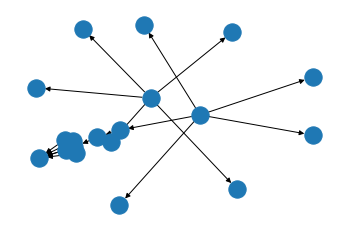

In [ ]:
# Rule a as a directed graph
rulea.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bccd61a50>)

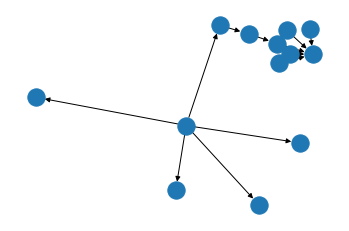

In [ ]:
# Rule b as a directed graph
ruleb.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bccd2b450>)

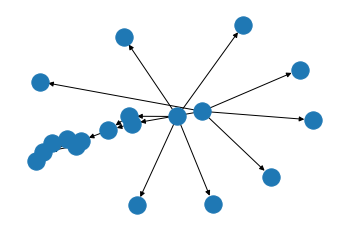

In [ ]:
# Rule c as a directed graph
rulec.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bccecd450>)

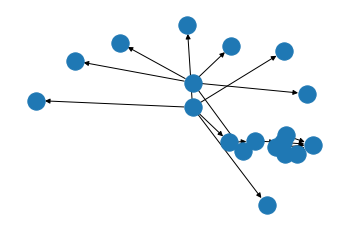

In [ ]:
# Rule d as a directed graph
ruled.view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f5bccd95ad0>)

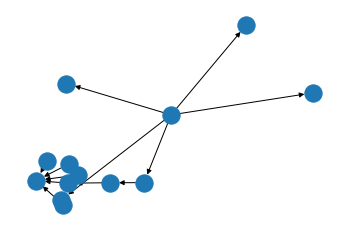

In [ ]:
# Rule e as a directed graph
rulee.view()

### Control System Creation and Simulation¶

Now that we have our rules defined, we can simply create a control system via:

In [ ]:
# Fuzzy system for the tip problem
tipping_ctrl = ctrl.ControlSystem([rulea, ruleb, rulec, ruled, rulee])

In order to simulate this control system, we will create a <code>ControlSystemSimulation</code>. Think of this object representing our controller applied to a specific set of cirucmstances. For tipping, this might be tipping one friend at the local brew-pub. We would create another <code>ControlSystemSimulation</code> when we’re trying to apply our <code>tipping_ctrl</code> for another friend at the cafe because the inputs would be different.

In [ ]:
# Calculate results from a ControlSystem
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

We can now simulate our control system by simply specifying the inputs and calling the compute method. Suppose we rated the quality 6.5 out of 10 and the service 9.8 of 10.

## TASK
Give 5 examples of usage, for instance, from the notebook; the service as 9.8, and the quality as 6.5 

## Example 1

In [ ]:
# 1
# Pass inputs to the ControlSystem using Antecedent labels
tipping.input['quality'] = 7
tipping.input['service'] = 7

# Compute the fuzzy system
tipping.compute()
print(tipping.output['tip'])

10.000004763118918


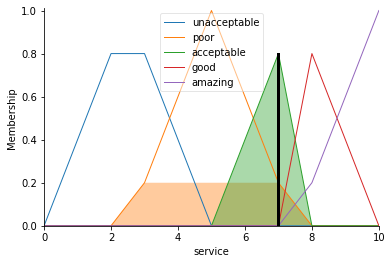

In [ ]:
service.view(sim=tipping)

## Example 2

In [ ]:
# 2
# Pass inputs to the ControlSystem using Antecedent labels

tipping.inputs({'service': 10, 'quality': 10})

# Compute the fuzzy system
tipping.compute()
print(tipping.output['tip'])

17.467470036410027


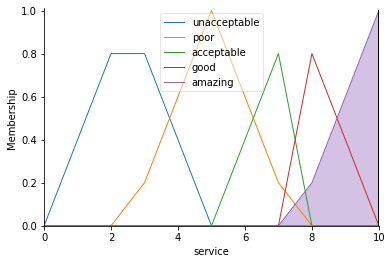

In [ ]:
service.view(sim=tipping)

## Example 3

In [ ]:
# 3
# Pass inputs to the ControlSystem using Antecedent labels

tipping.inputs({'service': 3, 'quality': 10})

# Compute the fuzzy system
tipping.compute()
print(tipping.output['tip'])

10.752900760112801


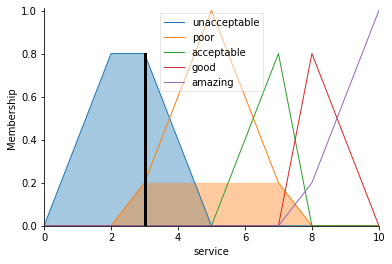

In [ ]:
service.view(sim=tipping)

## Example 4

In [ ]:
# 4
# Pass inputs to the ControlSystem using Antecedent labels
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 5
tipping.input['service'] = 2

# Compute the fuzzy system
tipping.compute()
print(tipping.output['tip'])

1.7032655653824766


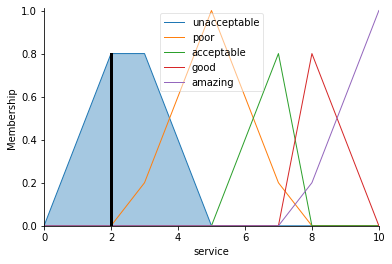

In [ ]:
service.view(sim=tipping)

## Example 5

In [ ]:
# 5
# Pass inputs to the ControlSystem using Antecedent labels
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 1
tipping.input['service'] = 8

# Compute the fuzzy system
tipping.compute()
print(tipping.output['tip'])

10.335094881852319


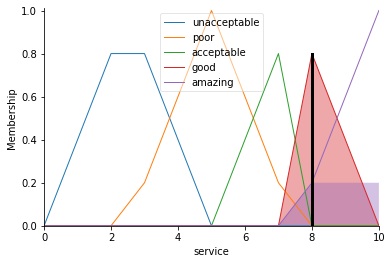

In [ ]:
service.view(sim=tipping)

# Part 2

## Perform a binary classification problem considering:
  * 'Iris-setosa' , 'Iris-versicolor' 
  * 'Iris-versicolor' , 'Iris-virginica'
  * 'Iris-setosa' , 'Iris-virginica'

#### Libraries

In [203]:
# install Fuzzy Classificator
!pip install FuzzyClassificator
!pip install fuzzy

In [204]:
from fuzzy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import numpy as np
from matplotlib import animation
import os
import io
import base64
from IPython.display import HTML

In [205]:
# mount drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [206]:
## data path in Drive
# upload the 'iris.csv' into your Google drive
# copy and paste the path to the dataset
iris = '/content/drive/MyDrive/iris.csv'

In [207]:
# read iris_data file
df = pd.read_csv(iris)

In [208]:
# adding labels to columns
df.columns=['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
# show first rows
df.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### TASK: Binary Classification

In [209]:
# iris dataset has three classes
print(df['class'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


#### 'Iris-setosa' , 'Iris-versicolor'

In [217]:
## convert it into binary classification problem
# in this case 'Iris-virginica' is removed
df0= df[~(df['class']=='Iris-virginica')]
# show two classes
print(df0['class'].unique())

[0 1]


In [223]:
## assigning a binary value as a class label

# class 0
df0.replace(to_replace='Iris-setosa', value=0, inplace=True)
# class 1
df0.replace(to_replace='Iris-versicolor', value=1, inplace=True)

# show first rows
df0.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


#### 'Iris-versicolor' , 'Iris-virginica'

In [224]:
## convert it into binary classification problem
# in this case 'Iris-setosa' is removed
df1 = df[~(df['class']=='Iris-setosa')]
# show two classes
print(df1['class'].unique())

[0 1]


In [225]:
## assigning a binary value as a class label

# class 0
df1.replace(to_replace='Iris-virginica', value=0, inplace=True)
# class 1
df1.replace(to_replace='Iris-versicolor', value=1, inplace=True)

# show first rows
df1.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


#### 'Iris-setosa' , 'Iris-virginica'

In [226]:
## convert it into binary classification problem
# in this case 'Iris-versicolor' is removed
df2 = df[~(df['class']=='Iris-setosa')]
# show two classes
print(df2['class'].unique())

[0 1]


In [227]:
## assigning a binary value as a class label

# class 0
df2.replace(to_replace='Iris-virginica', value=0, inplace=True)
# class 1
df2.replace(to_replace='Iris-setosa', value=1, inplace=True)

# show first rows
df2.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0


In [229]:
print(df0.head())
print(df1.head())
print(df2.head())

   sepal-length  sepal-width  petal-length  petal-width  class
0           4.9          3.0           1.4          0.2      0
1           4.7          3.2           1.3          0.2      0
2           4.6          3.1           1.5          0.2      0
3           5.0          3.6           1.4          0.2      0
4           5.4          3.9           1.7          0.4      0
   sepal-length  sepal-width  petal-length  petal-width  class
0           4.9          3.0           1.4          0.2      0
1           4.7          3.2           1.3          0.2      0
2           4.6          3.1           1.5          0.2      0
3           5.0          3.6           1.4          0.2      0
4           5.4          3.9           1.7          0.4      0
   sepal-length  sepal-width  petal-length  petal-width  class
0           4.9          3.0           1.4          0.2      0
1           4.7          3.2           1.3          0.2      0
2           4.6          3.1           1.5          0.2

### TASK: Perform a multi-classification problem considering: 'Iris-setosa' , 'Iris-versicolor' , 'Iris-virginica'


## Random Sampling

In [231]:
#Pulling random sample from the 3 dataframes

df0_s = df0.sample(frac=1)
print(df0_s.head())

df1_s = df1.sample(frac=1)
print(df1_s.head())

df2_s = df2.sample(frac=1)
print(df2_s.head())


    sepal-length  sepal-width  petal-length  petal-width  class
97           5.1          2.5           3.0          1.1      1
34           5.0          3.2           1.2          0.2      0
95           5.7          2.9           4.2          1.3      1
85           6.7          3.1           4.7          1.5      1
86           6.3          2.3           4.4          1.3      1
    sepal-length  sepal-width  petal-length  petal-width  class
43           5.1          3.8           1.9          0.4      0
4            5.4          3.9           1.7          0.4      0
38           5.1          3.4           1.5          0.2      0
42           5.0          3.5           1.6          0.6      0
74           6.6          3.0           4.4          1.4      1
    sepal-length  sepal-width  petal-length  petal-width  class
45           5.1          3.8           1.6          0.2      0
85           6.7          3.1           4.7          1.5      1
65           5.6          3.0           

## Normalization

In [232]:
## extracting the feature values

# In this particular case we'll use just 2 features
# to use the Animator class
feature_names = ['sepal-length', 'petal-length']
featureval0 = df0_s[feature_names].values
featureval1 = df1_s[feature_names].values
featureval2 = df2_s[feature_names].values

# show first rows
featureval0[0:9]
featureval1[0:9]
featureval2[0:9]

array([[5.1, 1.6],
       [6.7, 4.7],
       [5.6, 4.5],
       [5. , 1.5],
       [6.2, 4.5],
       [6.7, 4.4],
       [6.4, 4.3],
       [5.5, 4. ],
       [4.7, 1.3]])

In [233]:
## getting max & min values

# axis=0, acts on all the ROWS in each COLUMN
# axis=1, acts on all the COLUMNS in each ROW

# minimum & maximum from the df0
df0_min = np.min(featureval0, axis=0)
df0_max = np.max(featureval0, axis=0)

df1_min = np.min(featureval1, axis=0)
df1_max = np.max(featureval1, axis=0)

df2_min = np.min(featureval2, axis=0)
df2_max = np.max(featureval2, axis=0)

# show min & max values
print("Min:",df0_min, "Max:",df0_max)
print("Min:",df1_min, "Max:",df1_max)
print("Min:",df2_min, "Max:",df2_max)

Min: [4.3 1. ] Max: [7.  5.1]
Min: [4.3 1. ] Max: [7.  5.1]
Min: [4.3 1. ] Max: [7.  5.1]


In [234]:
## Normalizing feature values to fall in [0,1]

# normalized values 
feature_norm0 = (featureval0 - df0_min) / (df0_max - df0_min)
feature_norm1 = (featureval1 - df1_min) / (df1_max - df1_min)
feature_norm2 = (featureval2 - df2_min) / (df2_max - df2_min)
# show first rows
feature_norm0[0:9]
feature_norm1[0:9]
feature_norm2[0:9]

array([[0.2962963 , 0.14634146],
       [0.88888889, 0.90243902],
       [0.48148148, 0.85365854],
       [0.25925926, 0.12195122],
       [0.7037037 , 0.85365854],
       [0.88888889, 0.82926829],
       [0.77777778, 0.80487805],
       [0.44444444, 0.73170732],
       [0.14814815, 0.07317073]])

##Training and test sets

In [235]:
## Training & Test sets percentages

# percentage of training [0,1]
train_perc = 0.70

# number of items in the dataset
data_size0 = len(feature_norm0)
data_size1 = len(feature_norm1)
data_size2 = len(feature_norm2)

#feature_norm
train_size0 = round(data_size0*train_perc)
test_size0 = data_size0 - train_size0

train_size1 = round(data_size1*train_perc)
test_size1 = data_size1 - train_size1

train_size2 = round(data_size2*train_perc)
test_size2 = data_size2 - train_size2


In [237]:
# class labels
class_label0 = df0_s['class'].values
class_label1 = df1_s['class'].values
class_label2 = df2_s['class'].values

# training set
X_train0 = feature_norm0[0:train_size0]
Y_train0 = class_label0[0:train_size0]
X_train1 = feature_norm1[0:train_size1]
Y_train1 = class_label1[0:train_size1]
X_train2 = feature_norm2[0:train_size2]
Y_train2 = class_label2[0:train_size2]

# test set
X_test0 = feature_norm0[train_size0:]
Y_test0 = class_label0[train_size0:]
X_test1 = feature_norm1[train_size1:]
Y_test1 = class_label1[train_size1:]
X_test2 = feature_norm0[train_size2:]
Y_test2 = class_label0[train_size2:]


# be sure the last from training is not
# the same as the first from test
print(X_train0[train_size0-1], Y_train0[train_size0-1])
print(X_test0[0], Y_test0[0])

[0.33333333 0.09756098] 0
[0.92592593 0.92682927] 1


In [242]:
X_train0.shape, Y_train0.shape

((69, 2), (69,))

In [243]:
X_test0.shape, Y_test0.shape

((30, 2), (30,))

In [244]:
X_train1.shape, Y_train1.shape

((69, 2), (69,))

In [245]:
X_test1.shape, Y_test1.shape

((30, 2), (30,))

In [246]:
X_train2.shape, Y_train2.shape

((69, 2), (69,))

In [247]:
X_test2.shape, Y_test2.shape

((30, 2), (30,))

#### Animator

In [238]:
class Animator:
	'''
	An animator class only for animating 2D hyperboxes
	'''

	def __init__(self, box_history, train_patterns, classes, frame_rate, exp_bound, sensitivity,
				 filename='fuzzy_animation', verbose=True):
		# TODO: Customizable parameters
		assert len(box_history) == len(train_patterns), '{} (box-history) != {} (train_patterns)'.format(len(box_history), len(train_patterns))
		assert len(train_patterns[0][0]) == 2, 'Only 2D points are allowed.'

		self.fig = plt.figure()
		self.fig.set_dpi(100)
		self.fig.set_size_inches(7, 6.5)
		self.fig.suptitle('Fuzzy min-max classifier')
		if filename == '':
			filename = 'fuzzy_animation'
		self.filename = filename + '.mp4'
		self.box_history = box_history
		self.train_patterns = train_patterns
		self.classes = classes
		self.verbose = verbose

		self.frames = np.ravel(np.array([[i]*frame_rate for i in range(len(box_history))]))
		self.total = len(box_history)

		self.ax = plt.axes(xlim=(0, 1), ylim=(0, 1))
		self.ax.set_title('θ = {} and γ = {}'.format(exp_bound, sensitivity))
		self.rectangles = []
		self.scatters = []
		self.colormap = [np.array([255, 0, 0]), np.array([0, 0, 255])] + [self.__get_random_color(color) for i in range(len(np.unique(classes)) - 2)]

		for i in range((len(train_patterns))):
			x, y = train_patterns[i]
			y = int(y)
			if y == 0:
				self.scatters.append(plt.scatter(-1, -1, c=tuple(self.colormap[y] / 255)))

			else:
				self.scatters.append(plt.scatter(-1, -1, c=tuple(self.colormap[y] / 255)))
    
		for _class in classes:
			if _class == 0:
				self.rectangles.append(plt.Rectangle((0, 0), 0, 0, fill=False, color='r')) 
			else:
				self.rectangles.append(plt.Rectangle((0, 0), 0, 0, fill=False, color='b'))

		if self.verbose:
			print('{:<20}: {:<10}'.format('Total Boxes', len(self.rectangles)))
			print('{:<20}: {:<10}'.format('Points to plot', len(self.scatters)))


	def __get_random_color(self):
		r = lambda: random.randint(0,255)
		return np.array([r(), r(), r()])


	def box_to_rect(self, box):
		vj, wj = box
		height = wj[1] - vj[1]
		width = wj[0] - vj[0]
		return tuple(vj), width, height


	def init(self):
		for i in self.rectangles:
			self.ax.add_patch(i)

		return tuple(self.rectangles) + tuple(self.scatters)


	def _animate(self, i):
		hyperboxes = self.box_history[i]
		# Plot training point
		x, y = self.train_patterns[i]
		self.scatters[i].set_offsets(tuple(x))
		for box in range(len(hyperboxes)):
			base, width, height = self.box_to_rect(hyperboxes[box])
			self.rectangles[box].set_xy(base)
			if width == 0:
				width = 0.02
			if height == 0:
				height = 0.02

			self.rectangles[box].set_width(width)
			self.rectangles[box].set_height(height)

		if self.verbose:
			print('{:<20}: {}/{}'.format('Animating frame', i+1, self.total), end='\r')

		return tuple(self.rectangles) + tuple(self.scatters)


	def animate(self):
		'''
		Main function to start animation
		'''

		anim = animation.FuncAnimation(self.fig, self._animate, 
							   init_func = self.init, 
							   frames = self.frames, 
							   interval = 20,
							   blit = True)

		anim.save(self.filename, fps=30, 
				  extra_args=['-vcodec', 'h264', 
							  '-pix_fmt', 'yuv420p'])

		if self.verbose:
			print('Animation complete! Video saved at {}'.format(os.path.join(os.getcwd(), self.filename)))

In [240]:
class FuzzyMMC:

	def __init__(self, sensitivity=1, exp_bound=1, animate=False):
		'''
		Constructor for FuzzyMMC class
		'''
		self.sensitivity = sensitivity
		self.hyperboxes = None
		self.isanimate = animate
		self.classes = np.array([])
		self.exp_bound = exp_bound

		if self.animate:
			self.box_history = []
			self.train_patterns = []


	def membership(self, pattern):
		'''
		Calculates membership values a pattern
		
		Returns an ndarray of membership values of all hyperboxes
		'''
		min_pts = self.hyperboxes[:, 0, :]
		max_pts = self.hyperboxes[:, 1, :]
		
		a = np.maximum(0, (1 - np.maximum(0, (self.sensitivity * np.minimum(1, pattern - max_pts)))))
		b = np.maximum(0, (1 - np.maximum(0, (self.sensitivity * np.minimum(1, min_pts - pattern)))))

		return np.sum(a + b, axis=1) / (2 * len(pattern))


	def overlap_contract(self, index):
		'''
		Check if any classwise dissimilar hyperboxes overlap
		'''
		contracted = False
		for test_box in range(len(self.hyperboxes)):

			if self.classes[test_box] == self.classes[index]:
				# Ignore same class hyperbox overlap
				continue
	
			expanded_box = self.hyperboxes[index]
			box = self.hyperboxes[test_box]

			## TODO: Refactor for vectorization
			vj, wj = expanded_box
			vk, wk = box

			delta_new = delta_old = 1
			min_overlap_index = -1
			for i in range(len(vj)):
				if vj[i] < vk[i] < wj[i] < wk[i]:
					delta_new = min(delta_old, wj[i] - vk[i])

				elif vk[i] < vj[i] < wk[i] < wj[i]:
					delta_new = min(delta_old, wk[i] - vj[i])

				elif vj[i] < vk[i] < wk[i] < wj[i]:
					delta_new = min(delta_old, min(wj[i] - vk[i], wk[i] - vj[i]))

				elif vk[i] < vj[i] < wj[i] < wk[i]:
					delta_new = min(delta_old, min(wj[i] - vk[i], wk[i] - vj[i]))

				if delta_old - delta_new > 0:
					min_overlap_index = i
					delta_old = delta_new

			if min_overlap_index >= 0:
				i = min_overlap_index
				# We need to contract the expanded box
				if vj[i] < vk[i] < wj[i] < wk[i]:
					vk[i] = wj[i] = (vk[i] + wj[i])/2

				elif vk[i] < vj[i] < wk[i] < wj[i]:
					vj[i] = wk[i] = (vj[i] + wk[i])/2

				elif vj[i] < vk[i] < wk[i] < wj[i]:
					if (wj[i] - vk[i]) > (wk[i] - vj[i]):
						vj[i] = wk[i]

					else:
						wj[i] = vk[i]

				elif vk[i] < vj[i] < wj[i] < wk[i]:
					if (wk[i] - vj[i]) > (wj[i] - vk[i]):
						vk[i] = wj[i]

					else:
						wk[i] = vj[i]

				self.hyperboxes[test_box] = np.array([vk, wk])
				self.hyperboxes[index] = np.array([vj, wj])
				contracted = True

		return contracted



	def train_pattern(self, X, Y):
		'''
		Main function that trains a fuzzy min max classifier
		Note:
		Y is a one-hot encoded target variable
		'''
		target = Y
		
		if target not in self.classes:
			
			# Create a new hyberbox
			if self.hyperboxes is not None:
				self.hyperboxes = np.vstack((self.hyperboxes, np.array([[X, X]])))
				self.classes = np.hstack((self.classes, np.array([target])))

			else:
				self.hyperboxes = np.array([[X, X]])
				self.classes = np.array([target])

			if self.isanimate:
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))
		else:
			
			memberships = self.membership(X)
			memberships[np.where(self.classes != target)] = 0
			memberships = sorted(list(enumerate(memberships)), key=lambda x: x[1], reverse=True)
			
			# Expand the most suitable hyperbox
			count = 0
			while True:
				index = memberships[count][0]
				min_new = np.minimum(self.hyperboxes[index, 0, :], X)
				max_new = np.maximum(self.hyperboxes[index, 1, :], X)
				
				if self.exp_bound * len(np.unique(self.classes)) >= np.sum(max_new - min_new):
					self.hyperboxes[index, 0] = min_new
					self.hyperboxes[index, 1] = max_new
					break
				else:
					count += 1

				if count == len(memberships):
					self.hyperboxes = np.vstack((self.hyperboxes, np.array([[X, X]])))
					self.classes = np.hstack((self.classes, np.array([target])))
					index = len(self.hyperboxes) - 1
					break

			# Overlap test
			if self.isanimate:
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))

			contracted = self.overlap_contract(index)
			
			if self.isanimate and contracted:	
				self.box_history.append(np.copy(self.hyperboxes))
				self.train_patterns.append((X, Y))


	def fit(self, X, Y):
		'''
		Wrapper for train_pattern
		'''
		for x, y in zip(X, Y):
			self.train_pattern(x, y)


	def predict(self, X):
		'''
		Predict the class of the pattern X
		'''
		classes = np.unique(self.classes)
		results = []
		memberships = self.membership(X)
		max_prediction = 0
		pred_class = 0
		for _class in classes:
			mask = np.zeros((len(self.hyperboxes),))
			mask[np.where(self.classes == _class)] = 1
			p = memberships * mask
			prediction, class_index = np.max(p), np.argmax(p)
			if prediction > max_prediction:
				max_prediction = prediction
				pred_class = class_index

		return max_prediction, self.classes[pred_class] 


	def score(self, X, Y):
		'''
		Scores the classifier
		'''
		count = 0
		for x, y in zip(X, Y):
			_, pred = self.predict(x)
			if y == pred:
				count += 1

		return count / len(Y)


	def animate(self, frame_rate=10, filename='', verbose=True):
		'''
		To make a video of the classifier training.
		NOTE: Only possible when working with 2 dimensional patterns
		'''
		if self.isanimate:
			animator = Animator(box_history=self.box_history,
								train_patterns=self.train_patterns,
								classes=self.classes,
								frame_rate=frame_rate,
								exp_bound=self.exp_bound,
								sensitivity=self.sensitivity,
								filename=filename,
								verbose=verbose)

			animator.animate()

			return animator.filename

		else:
			raise Exception('No animation data was collected! Create a fuzzy classifier instance with animate=True')

## Fuzzy Classifier

In [248]:
clf0 = FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=True)
clf1 = FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=True)
clf2 = FuzzyMMC(sensitivity=1, exp_bound=0.1, animate=True)

In [252]:
clf0.fit(X_train0, Y_train0)
clf1.fit(X_train1, Y_train1)
clf2.fit(X_train2, Y_train2)

In [253]:
clf0.score(X_test0, Y_test0)


1.0

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

Total Boxes         : 20        
Points to plot      : 73        
Animation complete! Video saved at /content/fuzzy_animation.mp4


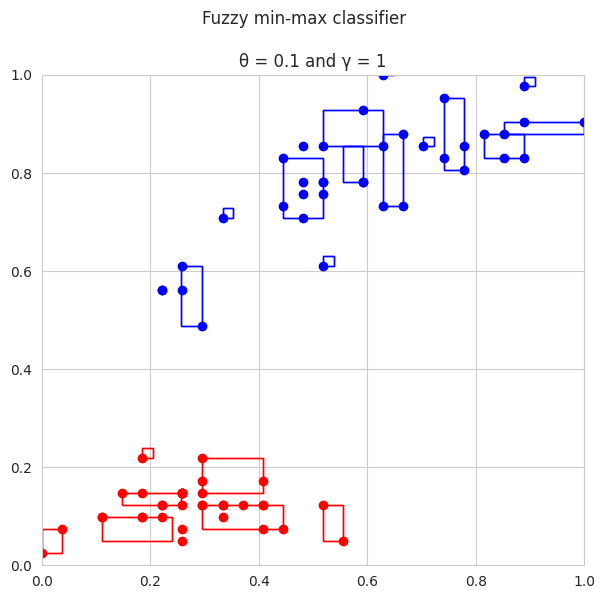

In [254]:
_ = clf0.animate()

# Part 3

####Design 3 clustering problems using 500 data points and use the fuzzy partition coefficient (FPC) from 2 to 15 clusters.
These are the problems
* Clustering problem 1 with 4 clusters
* Clustering problem 2 with 6 clusters
* Clustering problem 3 with 8 clusters

In [258]:
!pip install scikit-fuzzy
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

Text(0.5, 1.0, 'Test data: 500 points x4 clusters.')

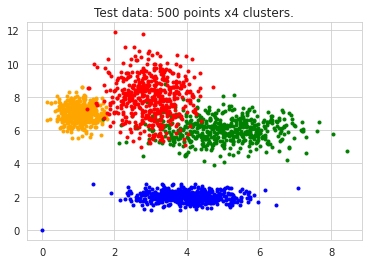

In [277]:
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],
           [1, 7],
           [5, 6],
           [3, 8],
           [2, 5],
           [15, 13],
           [8, 4],
           [12, 6],
           ]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],
          [0.3, 0.5],
          [1.1, 0.7],
          [0.6, 1.2],
          [0.1, 0.9],
          [1.4, 0.5],
          [1.9, 1.3],
          [0.7, 1.6]]

#Clusters = 4
c = 4

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(c):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 500 points x 4 clusters.')

Text(0.5, 1.0, 'Test data: 500 points x 4 clusters.')

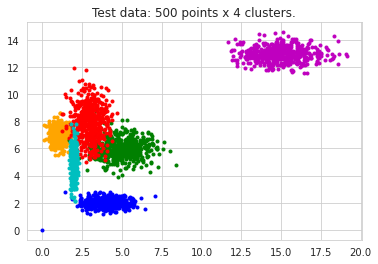

In [280]:
#Clusters = 6
c = 6

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(c):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 500 points x 4 clusters.')

Text(0.5, 1.0, 'Test data: 500 points x 4 clusters.')

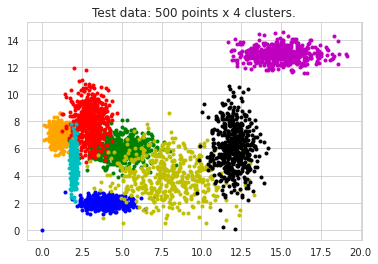

In [279]:
#Clusters = 8
c = 8

# Generate test data
np.random.seed(42)  # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
    xpts = np.hstack((xpts, np.random.standard_normal(500) * xsigma + xmu))
    ypts = np.hstack((ypts, np.random.standard_normal(500) * ysigma + ymu))
    labels = np.hstack((labels, np.ones(500) * i))

# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(c):
    ax0.plot(xpts[labels == label], ypts[labels == label], '.',
             color=colors[label])
ax0.set_title('Test data: 500 points x 4 clusters.')

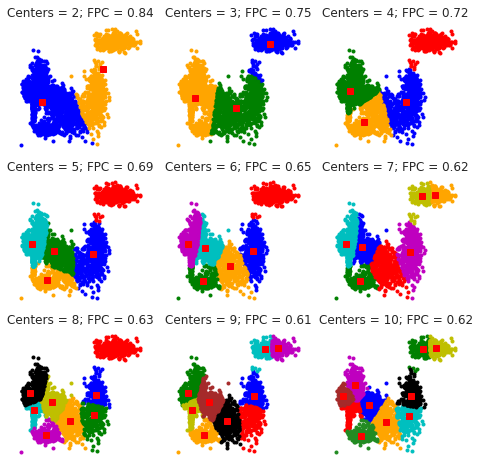

In [282]:
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)
    for j in range(ncenters):
        ax.plot(xpts[cluster_membership == j],
                ypts[cluster_membership == j], '.', color=colors[j])

    # Mark the center of each fuzzy cluster
    for pt in cntr:
        ax.plot(pt[0], pt[1], 'rs')

    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
    ax.axis('off')


An attempt to use FPC as requested in activity. All changes I made caused an error :(

Text(0, 0.5, 'Fuzzy partition coefficient')

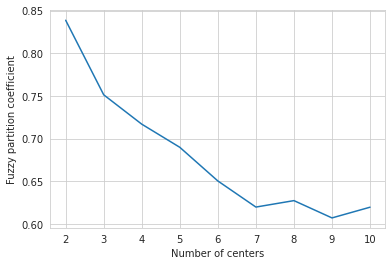

In [287]:
fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")